In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd

fichier = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Chomage/chomage-zone-t1-2003-t3-2024.xlsx'
# Charger uniquement la feuille 2 du fichier Excel
data = pd.read_excel(fichier, sheet_name=1)
# Utiliser la 3ème ligne comme titre des colonnes et supprimer les lignes précédentes
data.columns = data.iloc[4]  # La 3ème ligne devient les noms de colonnes
data = data[5:]  # Supprimer les 3 premières lignes (index 0, 1, 2)
data.reset_index(drop=True, inplace=True)  # Réinitialiser les index
# Filtrer les colonnes à partir de 2017 et regrouper par année
colonnes_taux = [col for col in data.columns if '-' in str(col) and int(col.split('-')[0]) >= 2017]
data_annee = data[colonnes_taux]
data_annee.columns = [col.split('-')[0] for col in colonnes_taux]  # Garder uniquement l'année dans les noms de colonnes

data_moyenne_par_annee = data_annee.astype(float).groupby(by=data_annee.columns, axis=1).mean()

# Ajouter les moyennes annuelles au DataFrame principal
data_chomage = pd.concat([data[['ZE2020', 'LIBZE2020']], data_moyenne_par_annee], axis=1)

# Afficher le DataFrame avec les moyennes annuelles
data_chomage

<ipython-input-2-43cf4b933f67>:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_moyenne_par_annee = data_annee.astype(float).groupby(by=data_annee.columns, axis=1).mean()


,ZE2020,LIBZE2020,2017,2018,2019,2020,2021,2022,2023,2024
0,0051,Alençon,8.825,8.425,8.050,7.525,7.150,6.650,6.500,6.766667
1,0052,Arles,12.400,11.900,11.150,10.650,10.450,9.750,9.900,9.900000
2,0053,Avignon,11.850,11.525,10.900,10.275,10.225,9.725,9.950,10.100000
3,0054,Beauvais,9.525,9.225,8.475,8.225,8.000,7.550,7.625,7.733333
4,0055,Bollène-Pierrelatte,11.775,11.500,10.650,9.875,9.750,9.225,9.150,9.100000
...,...,...,...,...,...,...,...,...,...,...
297,9403,Calvi,10.350,10.475,9.600,10.125,8.275,7.600,8.000,7.633333
298,9404,Corte,8.950,8.500,7.425,6.750,5.975,5.650,6.025,6.233333
299,9405,Ghisonaccia,10.900,10.500,9.725,8.750,7.900,7.525,7.925,8.300000
300,9406,Porto-Vecchio,12.675,11.600,10.325,11.075,8.750,7.250,7.875,8.500000


In [3]:
fichier = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Chomage/fr-esr-referentiel-geographique.csv'
try:
    data = pd.read_csv(fichier, sep=';', on_bad_lines='skip', encoding='utf-8', low_memory=False)
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")

EZ2020_DEP = data[[ 'ZE_ID','DEP_CODE']]

In [4]:
# Supprimer "ZE" du contenu de la colonne `ZE_ID`
EZ2020_DEP['ZE_ID'] = EZ2020_DEP['ZE_ID'].str.replace('^ZE', '', regex=True)

# Afficher le DataFrame modifié
EZ2020_DEP

<ipython-input-4-27c397b55e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EZ2020_DEP['ZE_ID'] = EZ2020_DEP['ZE_ID'].str.replace('^ZE', '', regex=True)


,ZE_ID,DEP_CODE
0,SO,50
1,2806,50
2,SO,50
3,2805,50
4,2805,50
...,...,...
38911,SO,987
38912,SO,988
38913,SO,988
38914,SO,988


In [5]:
# Renommer la colonne dans df2 pour correspondre à df1
EZ2020_DEP.rename(columns={'ZE_ID': 'ZE2020'}, inplace=True)

# Effectuer la jointure sur la colonne 'ZE2020'
merged_df = pd.merge(data_chomage, EZ2020_DEP, on='ZE2020', how='inner')

# Afficher le DataFrame fusionné
merged_df

<ipython-input-5-7372f4e8a397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EZ2020_DEP.rename(columns={'ZE_ID': 'ZE2020'}, inplace=True)


,ZE2020,LIBZE2020,2017,2018,2019,2020,2021,2022,2023,2024,DEP_CODE
0,0051,Alençon,8.825,8.425,8.050,7.525,7.15,6.65,6.500,6.766667,53
1,0051,Alençon,8.825,8.425,8.050,7.525,7.15,6.65,6.500,6.766667,53
2,0051,Alençon,8.825,8.425,8.050,7.525,7.15,6.65,6.500,6.766667,53
3,0051,Alençon,8.825,8.425,8.050,7.525,7.15,6.65,6.500,6.766667,61
4,0051,Alençon,8.825,8.425,8.050,7.525,7.15,6.65,6.500,6.766667,61
...,...,...,...,...,...,...,...,...,...,...,...
34946,9407,Propriano,11.600,10.250,9.375,9.475,7.75,6.95,7.375,7.466667,2A
34947,9407,Propriano,11.600,10.250,9.375,9.475,7.75,6.95,7.375,7.466667,2A
34948,9407,Propriano,11.600,10.250,9.375,9.475,7.75,6.95,7.375,7.466667,2A
34949,9407,Propriano,11.600,10.250,9.375,9.475,7.75,6.95,7.375,7.466667,2A


In [6]:
# Calculer le taux de chômage moyen par département pour chaque année
grouped = merged_df.groupby('DEP_CODE')[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean()

# Réinitialiser l'index pour obtenir un DataFrame propre
result = grouped.reset_index()

result = result.iloc[:-3,:]
# Afficher le résultat
result

,DEP_CODE,2017,2018,2019,2020,2021,2022,2023,2024
0,01,7.293495,6.887117,6.582270,6.481441,6.284758,5.784120,5.797577,5.948724
1,02,12.270927,11.720363,10.961591,10.301378,10.324687,9.783741,9.898778,9.909816
2,03,9.460252,9.182256,8.720741,8.261672,7.947871,7.461199,7.558675,7.731756
3,04,10.524874,10.201136,9.540278,8.924116,8.817424,8.254924,8.197601,8.146128
4,05,8.617593,8.334259,7.822222,7.611111,7.827778,6.736111,6.539815,6.325926
...,...,...,...,...,...,...,...,...,...
91,91,6.804639,6.595232,6.264562,6.262371,6.356959,5.997809,5.964046,6.094158
92,92,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333
93,93,8.840000,8.545000,7.970000,7.875000,8.025000,7.345000,7.320000,7.393333
94,94,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333


In [7]:
# Sélection des colonnes de données (exclure DEP_CODE)
chomage_data = result.iloc[:, 1:]

# Calcul des statistiques descriptives
stats_descriptives = chomage_data.describe().transpose()

# Afficher les statistiques
stats_descriptives

,count,mean,std,min,25%,50%,75%,max
2017,96.0,8.939773,1.600615,5.562602,7.846185,8.693123,9.671531,14.475
2018,96.0,8.537653,1.591397,5.271951,7.475954,8.335645,9.225544,14.275
2019,96.0,8.033633,1.496739,4.961382,7.023477,7.774850,8.681837,13.725
2020,96.0,7.659050,1.315255,4.779878,6.715367,7.517283,8.182196,12.650
2021,96.0,7.453359,1.365309,4.437195,6.483067,7.346027,8.025098,12.375
2022,96.0,6.936393,1.332663,4.117276,5.993149,6.740842,7.496914,11.750
2023,96.0,6.967838,1.357216,4.254675,6.064648,6.744835,7.563946,12.000
2024,96.0,7.081161,1.340238,4.356098,6.183235,6.915182,7.646902,12.200


Moyenne annuelle du taux de chômage :
2017    8.939773
2018    8.537653
2019    8.033633
2020    7.659050
2021    7.453359
2022    6.936393
2023    6.967838
2024    7.081161
dtype: float64


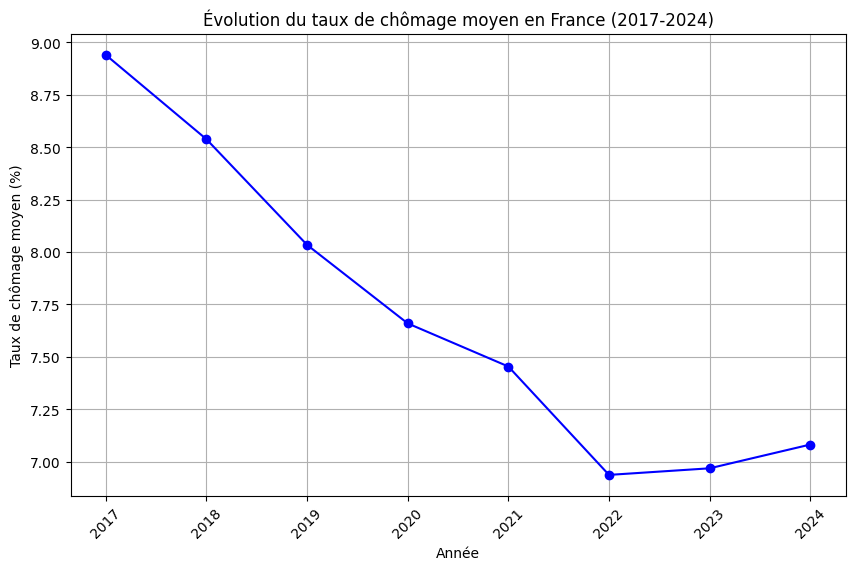

In [59]:
import matplotlib.pyplot as plt

# Calcul de la moyenne annuelle
moyenne_annuelle = chomage_data.mean()

# Affichage des moyennes
print("Moyenne annuelle du taux de chômage :")
print(moyenne_annuelle)

# Tracer la courbe d'évolution
plt.figure(figsize=(10, 6))
plt.plot(moyenne_annuelle.index, moyenne_annuelle.values, marker='o', linestyle='-', color='b')
plt.title("Évolution du taux de chômage moyen en France (2017-2024)")
plt.xlabel("Année")
plt.ylabel("Taux de chômage moyen (%)")
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [58]:
# Calcul du taux moyen par département (moyenne sur les colonnes)
moyenne_par_departement = chomage_data.mean(axis=1)

# Identifier les départements avec les taux les plus élevés et les plus bas
max_departement = moyenne_par_departement.idxmax()
min_departement = moyenne_par_departement.idxmin()

# Obtenir les valeurs correspondantes
max_val = moyenne_par_departement[max_departement]
min_val = moyenne_par_departement[min_departement]

# Afficher les résultats
print("Département avec le taux de chômage moyen le plus élevé :")
print(f"DEP_CODE : {result.loc[max_departement, 'DEP_CODE']}, Taux moyen : {max_val:.2f}%")

print("Département avec le taux de chômage moyen le plus bas :")
print(f"DEP_CODE : {result.loc[min_departement, 'DEP_CODE']}, Taux moyen : {min_val:.2f}%")

Département avec le taux de chômage moyen le plus élevé :
DEP_CODE : 66, Taux moyen : 12.93%
Département avec le taux de chômage moyen le plus bas :
DEP_CODE : 15, Taux moyen : 4.72%


In [57]:
# Trier les départements par leur taux moyen
classement = moyenne_par_departement.sort_values(ascending=False)

# Top 5 des plus élevés
top_5_hauts = classement.head(5)

# Top 5 des plus bas
top_5_bas = classement.tail(5)

# Afficher les résultats
print("Top 5 des départements avec les taux de chômage moyens les plus élevés :")
for i, dep_idx in enumerate(top_5_hauts.index):
    print(f"{i+1}. DEP_CODE : {result.loc[dep_idx, 'DEP_CODE']}, Taux moyen : {classement[dep_idx]:.2f}%")

print("\nTop 5 des départements avec les taux de chômage moyens les plus bas :")
for i, dep_idx in enumerate(top_5_bas.index):
    print(f"{i+1}. DEP_CODE : {result.loc[dep_idx, 'DEP_CODE']}, Taux moyen : {classement[dep_idx]:.2f}%")

Top 5 des départements avec les taux de chômage moyens les plus élevés :
1. DEP_CODE : 66, Taux moyen : 12.93%
2. DEP_CODE : 30, Taux moyen : 11.44%
3. DEP_CODE : 34, Taux moyen : 11.27%
4. DEP_CODE : 59, Taux moyen : 11.05%
5. DEP_CODE : 11, Taux moyen : 10.66%

Top 5 des départements avec les taux de chômage moyens les plus bas :
1. DEP_CODE : 48, Taux moyen : 5.93%
2. DEP_CODE : 50, Taux moyen : 5.93%
3. DEP_CODE : 39, Taux moyen : 5.87%
4. DEP_CODE : 53, Taux moyen : 5.54%
5. DEP_CODE : 15, Taux moyen : 4.72%


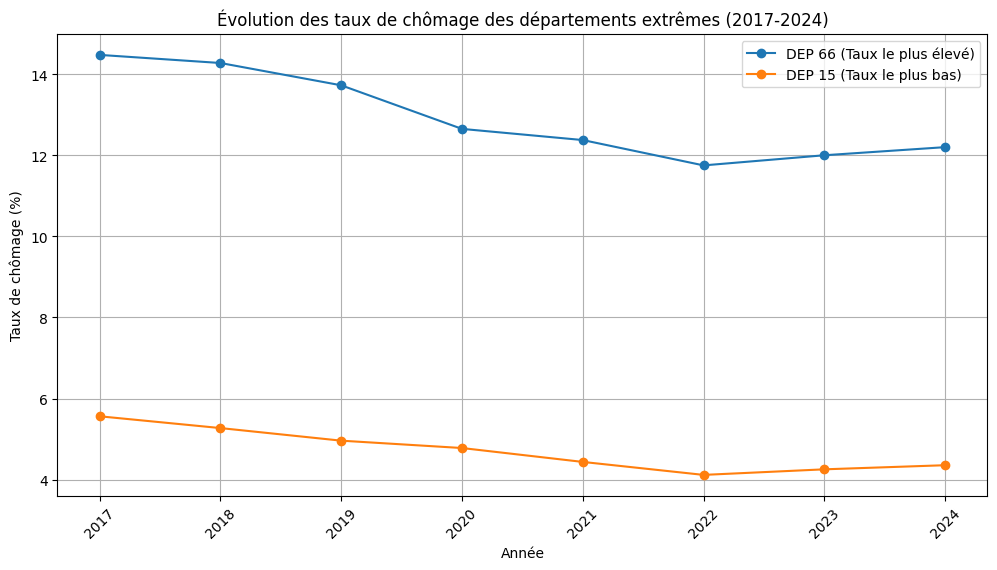

In [56]:
# Sélectionner les données des départements extrêmes (le plus élevé et le plus bas)
dep_max = result.loc[max_departement, '2017':'2024']
dep_min = result.loc[min_departement, '2017':'2024']

# Tracer les courbes d'évolution
plt.figure(figsize=(12, 6))

# Département avec le taux moyen le plus élevé
plt.plot(dep_max.index, dep_max.values, label=f"DEP {result.loc[max_departement, 'DEP_CODE']} (Taux le plus élevé)", marker='o')

# Département avec le taux moyen le plus bas
plt.plot(dep_min.index, dep_min.values, label=f"DEP {result.loc[min_departement, 'DEP_CODE']} (Taux le plus bas)", marker='o')

# Personnalisation du graphique
plt.title("Évolution des taux de chômage des départements extrêmes (2017-2024)")
plt.xlabel("Année")
plt.ylabel("Taux de chômage (%)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

Écart-type annuel du taux de chômage :
2017    1.600615
2018    1.591397
2019    1.496739
2020    1.315255
2021    1.365309
2022    1.332663
2023    1.357216
2024    1.340238
dtype: float64


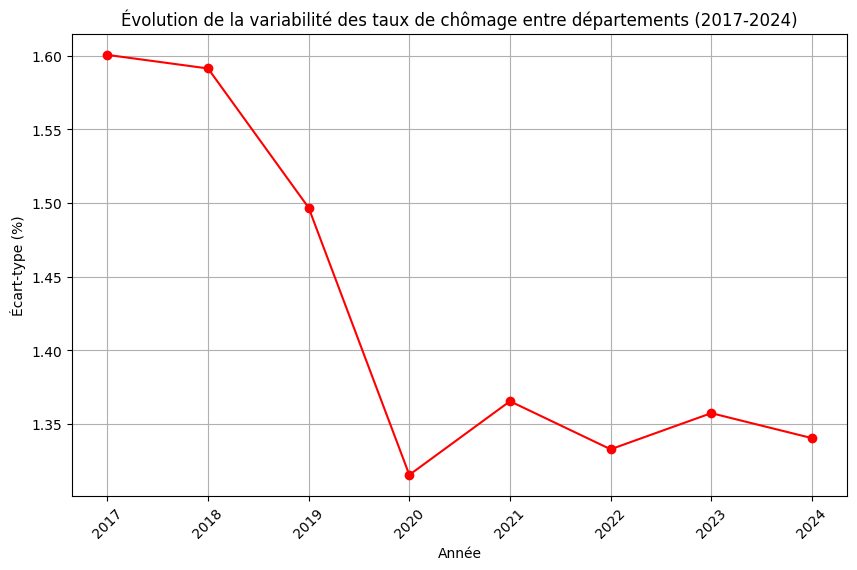

In [12]:
# Calcul de l'écart-type annuel
ecart_type_annuel = chomage_data.std()

# Affichage des résultats
print("Écart-type annuel du taux de chômage :")
print(ecart_type_annuel)

# Tracer la courbe de l'écart-type annuel
plt.figure(figsize=(10, 6))
plt.plot(ecart_type_annuel.index, ecart_type_annuel.values, marker='o', linestyle='-', color='r')
plt.title("Évolution de la variabilité des taux de chômage entre départements (2017-2024)")
plt.xlabel("Année")
plt.ylabel("Écart-type (%)")
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [14]:
data_elections_2017 = pd.read_csv('/content/drive/MyDrive/PIP2025_G7_Elections/Codes personnels/Code Cyprien/result_T2_2017.csv')
data_elections_2022 = pd.read_csv('/content/drive/MyDrive/PIP2025_G7_Elections/Codes personnels/Code Cyprien/result_T2_2022.csv')
data_elections_2024 = pd.read_csv('/content/drive/MyDrive/PIP2025_G7_Elections/Codes personnels/Code Cyprien/result_T2_2024.csv')

In [15]:
result['DEP_CODE'] = result['DEP_CODE'].str.zfill(2)
data_elections_2017['Code du département'] = data_elections_2017['Code du département'].str.zfill(2)
data_elections_2022['Code du département'] = data_elections_2022['Code du département'].str.zfill(2)
data_elections_2024['Code du département'] = data_elections_2024['Code département'].str.zfill(2)

In [17]:
# Fusionner sur des colonnes avec des noms différents
merged_data_2017 = pd.merge(result, data_elections_2017,
                       left_on='DEP_CODE', right_on='Code du département',
                       how='inner')
merged_data_2017

,DEP_CODE,2017,2018,2019,2020,2021,2022,2023,2024,Code du département,...,% Voix/Ins 1,% Voix/Exp 1,Code Nuance 2,Voix2,% Voix/Ins 2,% Voix/Exp 2,Code Nuance 3,Voix3,% Voix/Ins 3,% Voix/Exp 3
0,01,7.293495,6.887117,6.582270,6.481441,6.284758,5.784120,5.797577,5.948724,01,...,15.78,41.28,REM,48622.0,11.68,30.55,MDM,32433.0,7.79,20.38
1,02,12.270927,11.720363,10.961591,10.301378,10.324687,9.783741,9.898778,9.909816,02,...,16.41,40.90,REM,52549.0,13.99,34.85,LR,19019.0,5.06,12.61
2,03,9.460252,9.182256,8.720741,8.261672,7.947871,7.461199,7.558675,7.731756,03,...,21.82,52.47,LR,29172.0,11.51,27.68,COM,20915.0,8.25,19.85
3,04,10.524874,10.201136,9.540278,8.924116,8.817424,8.254924,8.197601,8.146128,04,...,25.32,62.54,FI,10244.0,8.10,20.01,FN,8933.0,7.06,17.45
4,05,8.617593,8.334259,7.822222,7.611111,7.827778,6.736111,6.539815,6.325926,05,...,24.54,63.13,LR,8828.0,8.03,20.66,DVD,6923.0,6.30,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,6.804639,6.595232,6.264562,6.262371,6.356959,5.997809,5.964046,6.094158,91,...,17.33,45.56,LR,71921.0,9.05,23.79,FI,37420.0,4.71,12.38
92,92,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,92,...,20.82,48.80,LR,140473.0,14.29,33.50,MDM,23705.0,2.41,5.65
93,93,8.840000,8.545000,7.970000,7.875000,8.025000,7.345000,7.320000,7.393333,93,...,14.62,46.53,FI,78000.0,10.15,32.29,UDI,21788.0,2.84,9.02
94,94,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,94,...,17.21,45.72,LR,88598.0,11.26,29.92,FI,33458.0,4.25,11.30


In [18]:
merged_data_2022 = pd.merge(result, data_elections_2022,
                       left_on='DEP_CODE', right_on='Code du département',
                       how='inner')
merged_data_2022

,DEP_CODE,2017,2018,2019,2020,2021,2022,2023,2024,Code du département,...,% Voix/Ins 1,% Voix/Exp 1,Code Nuance 2,Voix2,% Voix/Ins 2,% Voix/Exp 2,Code Nuance 3,Voix3,% Voix/Ins 3,% Voix/Exp 3
0,01,7.293495,6.887117,6.582270,6.481441,6.284758,5.784120,5.797577,5.948724,01,...,16.23,39.83,ENS,43358.0,9.84,24.14,LR,24407.0,5.54,13.59
1,02,12.270927,11.720363,10.961591,10.301378,10.324687,9.783741,9.898778,9.909816,02,...,21.53,52.51,NUP,28015.0,7.48,18.25,ENS,27404.0,7.32,17.86
2,03,9.460252,9.182256,8.720741,8.261672,7.947871,7.461199,7.558675,7.731756,03,...,15.09,36.68,ENS,29843.0,11.91,28.96,LR,19296.0,7.70,18.72
3,04,10.524874,10.201136,9.540278,8.924116,8.817424,8.254924,8.197601,8.146128,04,...,23.45,50.20,ENS,15134.0,11.77,25.19,RN,14791.0,11.50,24.62
4,05,8.617593,8.334259,7.822222,7.611111,7.827778,6.736111,6.539815,6.325926,05,...,25.30,53.44,NUP,25118.0,22.05,46.56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,6.804639,6.595232,6.264562,6.262371,6.356959,5.997809,5.964046,6.094158,91,...,21.59,49.40,ENS,139033.0,17.28,39.53,RN,19607.0,2.44,5.58
92,92,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,92,...,26.88,54.37,NUP,184068.0,18.33,37.07,LR,42528.0,4.23,8.56
93,93,8.840000,8.545000,7.970000,7.875000,8.025000,7.345000,7.320000,7.393333,93,...,22.27,65.45,ENS,61872.0,8.59,25.25,UDI,11395.0,1.58,4.65
94,94,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,94,...,22.40,50.28,ENS,152153.0,18.95,42.55,LR,25641.0,3.19,7.17


In [19]:
merged_data_2024 = pd.merge(result, data_elections_2024,
                       left_on='DEP_CODE', right_on='Code département',
                       how='inner')
merged_data_2024

,DEP_CODE,2017,2018,2019,2020,2021,2022,2023,2024,Code département,...,% Voix/exprimés 1,Nuance candidat 2,Voix 2,% Voix/inscrits 2,% Voix/exprimés 2,Nuance candidat 3,Voix 3,% Voix/inscrits 3,% Voix/exprimés 3,Code du département
0,01,7.293495,6.887117,6.582270,6.481441,6.284758,5.784120,5.797577,5.948724,01,...,"37,47%",ENS,103368.0,"23,13%","35,08%",LR,33889.0,"7,58%","11,50%",01
1,02,12.270927,11.720363,10.961591,10.301378,10.324687,9.783741,9.898778,9.909816,02,...,"50,58%",RN,22409.0,"30,62%","49,42%",NaN,NaN,NaN,NaN,02
2,03,9.460252,9.182256,8.720741,8.261672,7.947871,7.461199,7.558675,7.731756,03,...,"44,67%",LR,46601.0,"18,75%","28,77%",UG,43029.0,"17,31%","26,56%",03
3,04,10.524874,10.201136,9.540278,8.924116,8.817424,8.254924,8.197601,8.146128,04,...,"47,48%",UXD,21655.0,"16,90%","26,33%",RN,21536.0,"16,81%","26,19%",04
4,05,8.617593,8.334259,7.822222,7.611111,7.827778,6.736111,6.539815,6.325926,05,...,"53,89%",RN,34857.0,"30,42%","46,11%",NaN,NaN,NaN,NaN,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,6.804639,6.595232,6.264562,6.262371,6.356959,5.997809,5.964046,6.094158,91,...,"47,19%",RN,119303.0,"14,78%","23,80%",ENS,81221.0,"10,06%","16,21%",91
92,92,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,92,...,"41,70%",UG,185769.0,"26,47%","40,86%",LR,79293.0,"11,30%","17,44%",92
93,93,8.840000,8.545000,7.970000,7.875000,8.025000,7.345000,7.320000,7.393333,93,...,"61,98%",RN,37232.0,"8,79%","16,86%",DVG,25033.0,"5,91%","11,33%",93
94,94,8.350000,8.075000,7.525000,7.425000,7.550000,6.875000,6.850000,6.933333,94,...,"42,06%",ENS,83954.0,"15,17%","23,04%",LR,51201.0,"9,25%","14,05%",94


In [20]:
merged_data_2017.drop(columns=['2018', '2019', '2020', '2021','2022', '2023', '2024', 'Code du département'], inplace=True)
merged_data_2022.drop(columns=['2017', '2018', '2019', '2020', '2021', '2023', '2024', 'Code du département'], inplace=True)
merged_data_2024.drop(columns=['2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Code département'], inplace=True)

In [21]:
merged_data_2017

,DEP_CODE,2017,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Voix/Ins 1,% Voix/Exp 1,Code Nuance 2,Voix2,% Voix/Ins 2,% Voix/Exp 2,Code Nuance 3,Voix3,% Voix/Ins 3,% Voix/Exp 3
0,01,7.293495,Ain,416399,242372,58.21,174027,41.79,11204,2.69,...,15.78,41.28,REM,48622.0,11.68,30.55,MDM,32433.0,7.79,20.38
1,02,12.270927,Aisne,375746,210975,56.15,164771,43.85,9985,2.66,...,16.41,40.90,REM,52549.0,13.99,34.85,LR,19019.0,5.06,12.61
2,03,9.460252,Allier,253423,133978,52.87,119445,47.13,9160,3.61,...,21.82,52.47,LR,29172.0,11.51,27.68,COM,20915.0,8.25,19.85
3,04,10.524874,Alpes-de-Haute-Provence,126465,68543,54.20,57922,45.80,4705,3.72,...,25.32,62.54,FI,10244.0,8.10,20.01,FN,8933.0,7.06,17.45
4,05,8.617593,Hautes-Alpes,109902,60420,54.98,49482,45.02,4841,4.40,...,24.54,63.13,LR,8828.0,8.03,20.66,DVD,6923.0,6.30,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,6.804639,Essonne,794894,459391,57.79,335503,42.21,24303,3.06,...,17.33,45.56,LR,71921.0,9.05,23.79,FI,37420.0,4.71,12.38
92,92,8.350000,Hauts-de-Seine,983053,525782,53.48,457271,46.52,32410,3.30,...,20.82,48.80,LR,140473.0,14.29,33.50,MDM,23705.0,2.41,5.65
93,93,8.840000,Seine-Saint-Denis,768469,504340,65.63,264129,34.37,16744,2.18,...,14.62,46.53,FI,78000.0,10.15,32.29,UDI,21788.0,2.84,9.02
94,94,8.350000,Val-de-Marne,786565,461562,58.68,325003,41.32,21451,2.73,...,17.21,45.72,LR,88598.0,11.26,29.92,FI,33458.0,4.25,11.30


In [22]:
merged_data_2022

,DEP_CODE,2022,Libellé du département,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,% Voix/Ins 1,% Voix/Exp 1,Code Nuance 2,Voix2,% Voix/Ins 2,% Voix/Exp 2,Code Nuance 3,Voix3,% Voix/Ins 3,% Voix/Exp 3
0,01,5.784120,Ain,Complet,440749,242450,55.01,198299,44.99,14294,...,16.23,39.83,ENS,43358.0,9.84,24.14,LR,24407.0,5.54,13.59
1,02,9.783741,Aisne,Complet,374307,207256,55.37,167051,44.63,10300,...,21.53,52.51,NUP,28015.0,7.48,18.25,ENS,27404.0,7.32,17.86
2,03,7.461199,Allier,Complet,250522,132123,52.74,118399,47.26,10410,...,15.09,36.68,ENS,29843.0,11.91,28.96,LR,19296.0,7.70,18.72
3,04,8.254924,Alpes-de-Haute-Provence,Complet,128626,61597,47.89,67029,52.11,4955,...,23.45,50.20,ENS,15134.0,11.77,25.19,RN,14791.0,11.50,24.62
4,05,6.736111,Hautes-Alpes,Complet,113927,54799,48.10,59128,51.90,3481,...,25.30,53.44,NUP,25118.0,22.05,46.56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,5.997809,Essonne,Complet,804779,426433,52.99,378346,47.01,19719,...,21.59,49.40,ENS,139033.0,17.28,39.53,RN,19607.0,2.44,5.58
92,92,6.875000,Hauts-de-Seine,Complet,1004370,481170,47.91,523200,52.09,22297,...,26.88,54.37,NUP,184068.0,18.33,37.07,LR,42528.0,4.23,8.56
93,93,7.345000,Seine-Saint-Denis,Complet,720090,456489,63.39,263601,36.61,14412,...,22.27,65.45,ENS,61872.0,8.59,25.25,UDI,11395.0,1.58,4.65
94,94,6.875000,Val-de-Marne,Complet,802902,425924,53.05,376978,46.95,14159,...,22.40,50.28,ENS,152153.0,18.95,42.55,LR,25641.0,3.19,7.17


In [23]:
merged_data_2024

,DEP_CODE,2024,Libellé département,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,% Exprimés/inscrits,...,% Voix/exprimés 1,Nuance candidat 2,Voix 2,% Voix/inscrits 2,% Voix/exprimés 2,Nuance candidat 3,Voix 3,% Voix/inscrits 3,% Voix/exprimés 3,Code du département
0,01,5.948724,Ain,446979,311188,"69,62%",135791,"30,38%",294688,"65,93%",...,"37,47%",ENS,103368.0,"23,13%","35,08%",LR,33889.0,"7,58%","11,50%",01
1,02,9.909816,Aisne,73181,46620,"63,71%",26561,"36,29%",45342,"61,96%",...,"50,58%",RN,22409.0,"30,62%","49,42%",NaN,NaN,NaN,NaN,02
2,03,7.731756,Allier,248529,171908,"69,17%",76621,"30,83%",161987,"65,18%",...,"44,67%",LR,46601.0,"18,75%","28,77%",UG,43029.0,"17,31%","26,56%",03
3,04,8.146128,Alpes-de-Haute-Provence,128146,90407,"70,55%",37739,"29,45%",82231,"64,17%",...,"47,48%",UXD,21655.0,"16,90%","26,33%",RN,21536.0,"16,81%","26,19%",04
4,05,6.325926,Hautes-Alpes,114587,82882,"72,33%",31705,"27,67%",75600,"65,98%",...,"53,89%",RN,34857.0,"30,42%","46,11%",NaN,NaN,NaN,NaN,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,6.094158,Essonne,807089,533687,"66,12%",273402,"33,88%",501202,"62,10%",...,"47,19%",RN,119303.0,"14,78%","23,80%",ENS,81221.0,"10,06%","16,21%",91
92,92,6.933333,Hauts-de-Seine,701910,479419,"68,30%",222491,"31,70%",454638,"64,77%",...,"41,70%",UG,185769.0,"26,47%","40,86%",LR,79293.0,"11,30%","17,44%",92
93,93,7.393333,Seine-Saint-Denis,423531,242087,"57,16%",181444,"42,84%",220882,"52,15%",...,"61,98%",RN,37232.0,"8,79%","16,86%",DVG,25033.0,"5,91%","11,33%",93
94,94,6.933333,Val-de-Marne,553268,374240,"67,64%",179028,"32,36%",364336,"65,85%",...,"42,06%",ENS,83954.0,"15,17%","23,04%",LR,51201.0,"9,25%","14,05%",94


In [60]:
# Grouper les données par parti
groups_2017 = [group['2017'].values for name, group in merged_data_2017.groupby('Code Nuance 1')]
groups_2022 = [group['2022'].values for name, group in merged_data_2022.groupby('Code Nuance 1')]
groups_2024 = [group['2024'].values for name, group in merged_data_2024.groupby('Nuance candidat 1')]

In [25]:
# Discrétiser les taux de chômage pour chaque année
merged_data_2017['Classe'] = pd.qcut(result['2017'], q=4, labels=['Faible', 'Moyen', 'Élevé', 'Très élevé'])
merged_data_2022['Classe'] = pd.qcut(result['2022'], q=4, labels=['Faible', 'Moyen', 'Élevé', 'Très élevé'])
merged_data_2024['Classe'] = pd.qcut(result['2024'], q=4, labels=['Faible', 'Moyen', 'Élevé', 'Très élevé'])

In [26]:
# Vérifier les colonnes catégoriques
categorical_data_2017 = merged_data_2017[['DEP_CODE','2017','Classe', 'Code Nuance 1']]

categorical_data_2017

,DEP_CODE,2017,Classe,Code Nuance 1
0,01,7.293495,Faible,LR
1,02,12.270927,Très élevé,FN
2,03,9.460252,Élevé,REM
3,04,10.524874,Très élevé,REM
4,05,8.617593,Moyen,REM
...,...,...,...,...
91,91,6.804639,Faible,REM
92,92,8.350000,Moyen,REM
93,93,8.840000,Élevé,REM
94,94,8.350000,Moyen,REM


In [27]:
# Vérifier les colonnes catégoriques
categorical_data_2022 = merged_data_2022[['DEP_CODE','2022', 'Classe', 'Code Nuance 1']]

categorical_data_2022

,DEP_CODE,2022,Classe,Code Nuance 1
0,01,5.784120,Faible,NUP
1,02,9.783741,Très élevé,RN
2,03,7.461199,Élevé,NUP
3,04,8.254924,Très élevé,NUP
4,05,6.736111,Moyen,ENS
...,...,...,...,...
91,91,5.997809,Moyen,NUP
92,92,6.875000,Élevé,ENS
93,93,7.345000,Élevé,NUP
94,94,6.875000,Élevé,NUP


In [28]:
# Vérifier les colonnes catégoriques
categorical_data_2024 = merged_data_2024[['DEP_CODE','2024', 'Classe', 'Nuance candidat 1']]

categorical_data_2024

,DEP_CODE,2024,Classe,Nuance candidat 1
0,01,5.948724,Faible,RN
1,02,9.909816,Très élevé,LR
2,03,7.731756,Très élevé,RN
3,04,8.146128,Très élevé,UG
4,05,6.325926,Moyen,UG
...,...,...,...,...
91,91,6.094158,Faible,UG
92,92,6.933333,Élevé,ENS
93,93,7.393333,Élevé,UG
94,94,6.933333,Élevé,UG


In [32]:
from google.colab import files

categorical_data_2017.to_csv('categorical_data_2017.csv', index=False)
files.download('categorical_data_2017.csv')

categorical_data_2022.to_csv('categorical_data_2022.csv', index=False)
files.download('categorical_data_2022.csv')

categorical_data_2024.to_csv('categorical_data_2024.csv', index=False)
files.download('categorical_data_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import geopandas as gpd

# Fusionner les données géographiques et statistiques 2017
geo_departements_2017 = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
geo_data_2017 = geo_departements_2017.merge(categorical_data_2017,
                                  left_on="code",
                                  right_on="DEP_CODE")

# Fusionner les données géographiques et statistiques 2022
geo_departements_2022 = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
geo_data_2022 = geo_departements_2022.merge(categorical_data_2022,
                                  left_on="code",
                                  right_on="DEP_CODE")

# Fusionner les données géographiques et statistiques 2024
geo_departements_2024 = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
geo_data_2024 = geo_departements_2024.merge(categorical_data_2024,
                                  left_on="code",
                                  right_on="DEP_CODE")

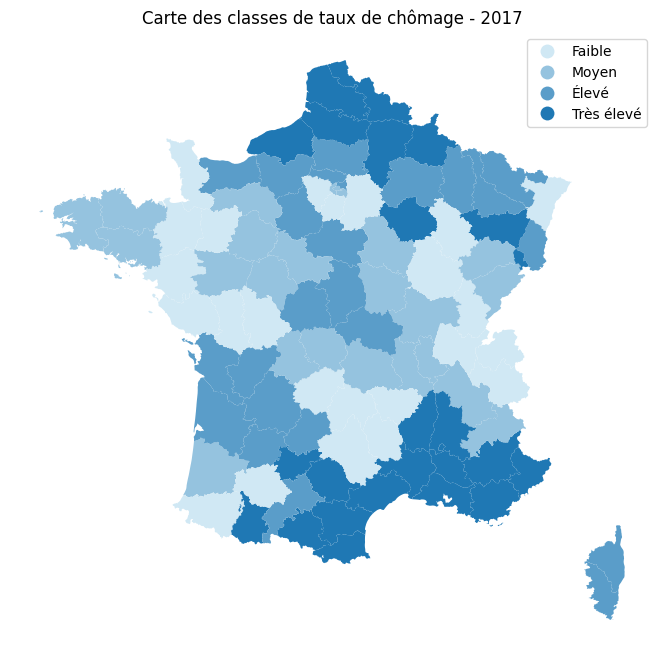

In [61]:
from matplotlib.colors import LinearSegmentedColormap

# Créer un dégradé personnalisé
colors = ["#d0e8f4", "#1f78b4"]
cmap = LinearSegmentedColormap.from_list("custom_blue", colors)

# Tracer une carte pour l'année 2017
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

geo_data_2017.plot(
    column='Classe',
    ax=ax,
    legend=True,
    cmap= cmap,
)
ax.axis('off')
plt.title("Carte des classes de taux de chômage - 2017")
plt.show()

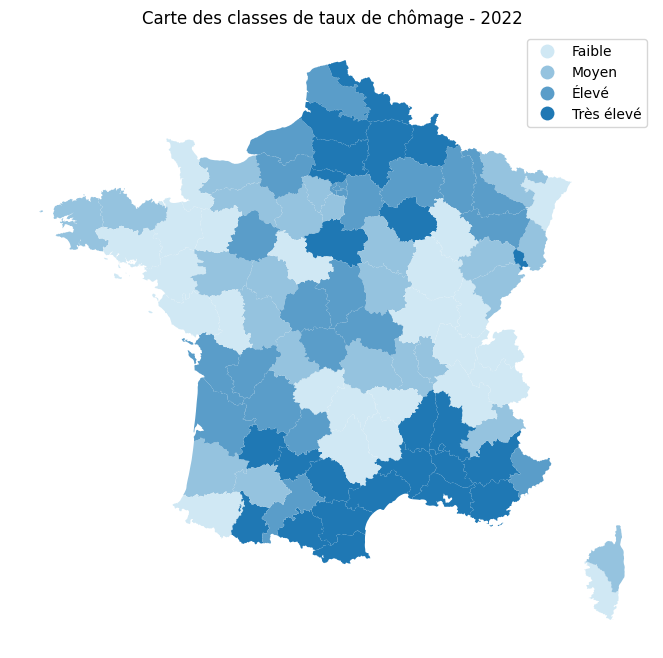

In [36]:
# Tracer une carte pour l'année 2022
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

geo_data_2022.plot(
    column='Classe',
    ax=ax,
    legend=True,
    cmap= cmap,
)
ax.axis('off')
plt.title("Carte des classes de taux de chômage - 2022")
plt.show()

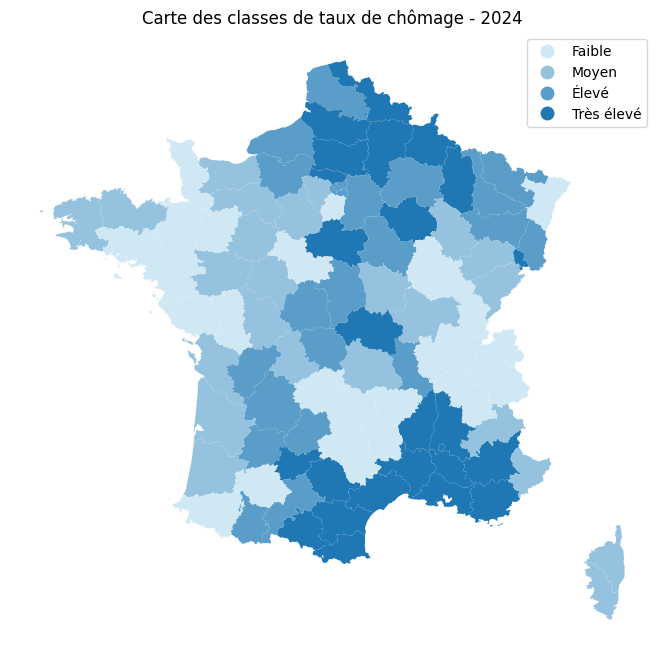

In [37]:
# Tracer une carte pour l'année 2024
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

geo_data_2024.plot(
    column='Classe',
    ax=ax,
    legend=True,
    cmap= cmap,
)

ax.axis('off')
plt.title("Carte des classes de taux de chômage - 2024")
plt.show()

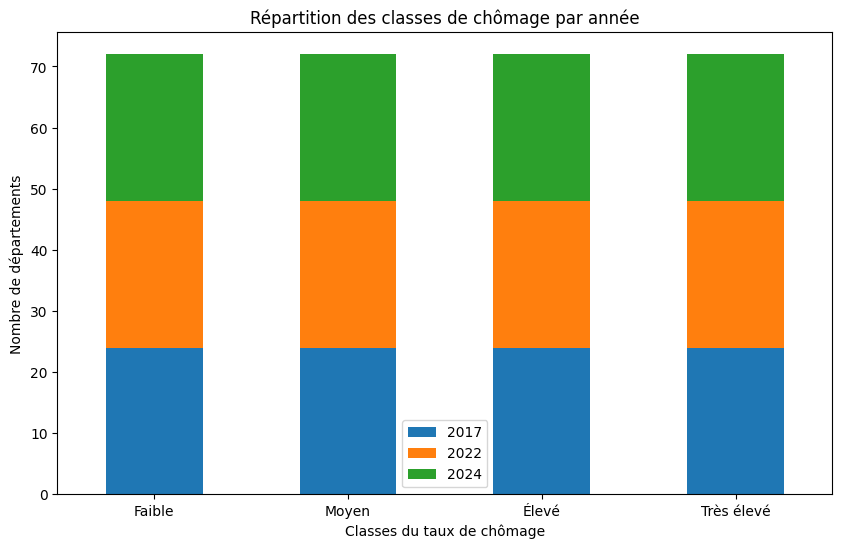

In [39]:
# Compter les occurrences des clusters pour chaque année
count_2017 = categorical_data_2017['Classe'].value_counts()
count_2022 = categorical_data_2022['Classe'].value_counts()
count_2024 = categorical_data_2024['Classe'].value_counts()

# Créer un dataframe de comparaison
df_counts = pd.DataFrame({
    '2017': count_2017,
    '2022': count_2022,
    '2024': count_2024
}).fillna(0)

# Diagramme en barres empilées
df_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des classes de chômage par année')
plt.ylabel('Nombre de départements')
plt.xlabel('Classes du taux de chômage')
plt.xticks(rotation=0)
plt.show()

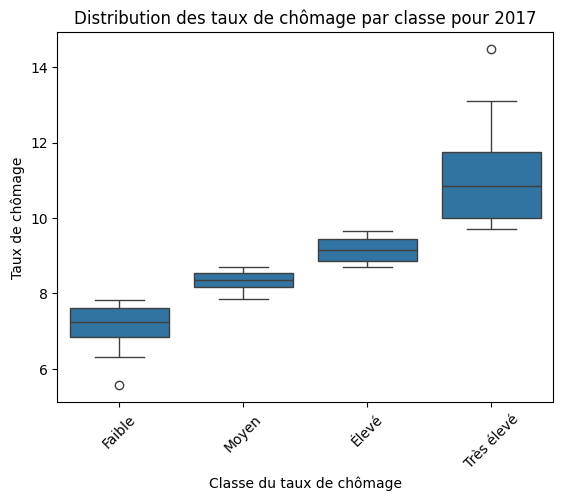

In [41]:
import seaborn as sns

# Boxplot pour chaque année
sns.boxplot(x='Classe', y='2017', data=categorical_data_2017)
plt.title('Distribution des taux de chômage par classe pour 2017')
plt.ylabel('Taux de chômage')
plt.xlabel('Classe du taux de chômage')
plt.xticks(rotation=45)
plt.show()

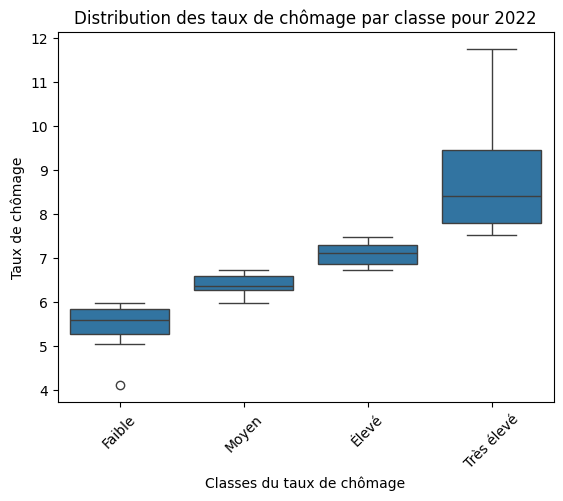

In [42]:
sns.boxplot(x='Classe', y='2022', data=categorical_data_2022)
plt.title('Distribution des taux de chômage par classe pour 2022')
plt.ylabel('Taux de chômage')
plt.xlabel('Classes du taux de chômage')
plt.xticks(rotation=45)
plt.show()

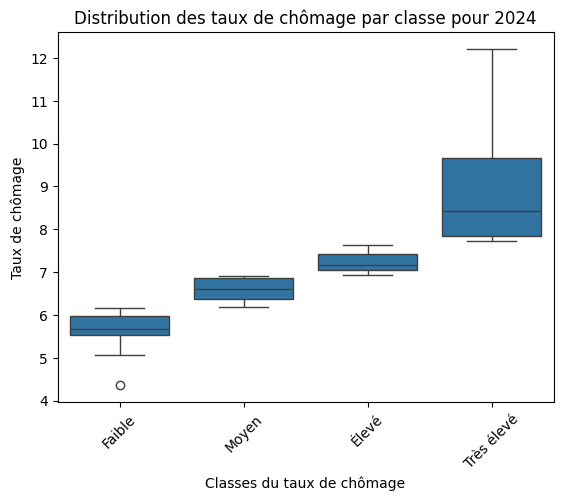

In [43]:
sns.boxplot(x='Classe', y='2024', data=categorical_data_2024)
plt.title('Distribution des taux de chômage par classe pour 2024')
plt.ylabel('Taux de chômage')
plt.xlabel('Classes du taux de chômage')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Fonction pour classifier les nuances politiques
def classifier_nuances_2017(nuance):
    if nuance in ['LR', 'UDI']:
        return 'Droite'
    elif nuance == 'FN':
        return 'Extrême Droite'
    elif nuance in ['REM', 'MDM']:
        return 'Centre'
    elif nuance in ['FI','LFI', 'RDG']:
        return 'Gauche'
    elif nuance == 'REG':
        return 'Divers'

In [45]:
# Fonction pour classifier les nuances politiques
def classifier_nuances_2022(nuance):
    if nuance in ['ENS']:
        return 'Centre'
    elif nuance in ['LR', 'UDI']:
        return 'Droite'
    elif nuance == 'RN':
        return 'Extrême Droite'
    elif nuance in ['NUP']:
        return 'Gauche'
    elif nuance == 'REG':
        return 'Divers'

In [46]:
# Fonction pour classifier les nuances politiques
def classifier_nuances_2024(nuance):
    if nuance in ['LR', 'DVD']:
        return 'Droite'
    elif nuance in ['RN','UXD']:
        return 'Extrême Droite'
    elif nuance in ['ENS', 'MDM']:
        return 'Centre'
    elif nuance in ['UG']:
        return 'Gauche'
    elif nuance == 'REG':
        return 'Divers'

In [47]:
# Ajouter une colonne 'Classe Parti' au dataframe
categorical_data_2017['Classe Parti'] = categorical_data_2017['Code Nuance 1'].apply(classifier_nuances_2017)
categorical_data_2022['Classe Parti'] = categorical_data_2022['Code Nuance 1'].apply(classifier_nuances_2022)
categorical_data_2024['Classe Parti'] = categorical_data_2024['Nuance candidat 1'].apply(classifier_nuances_2024)

<ipython-input-47-deca4c503469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_2017['Classe Parti'] = categorical_data_2017['Code Nuance 1'].apply(classifier_nuances_2017)
<ipython-input-47-deca4c503469>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_2022['Classe Parti'] = categorical_data_2022['Code Nuance 1'].apply(classifier_nuances_2022)
<ipython-input-47-deca4c503469>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [48]:
categorical_data_2017.to_csv('data_2017.csv', index=False)
files.download('categorical_data_2017.csv')

categorical_data_2022.to_csv('data_2022.csv', index=False)
files.download('categorical_data_2022.csv')

categorical_data_2024.to_csv('data_2024.csv', index=False)
files.download('categorical_data_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Compter les occurrences de chaque classe
categorical_data_2017['Classe Parti'].value_counts()

,count
Classe Parti,
Centre,72
Droite,18
Extrême Droite,3
Gauche,2
Divers,1


In [50]:
categorical_data_2022['Classe Parti'].value_counts()

,count
Classe Parti,
Centre,35
Gauche,28
Extrême Droite,24
Droite,7
Divers,2


In [51]:
categorical_data_2024['Classe Parti'].value_counts()

,count
Classe Parti,
Extrême Droite,47
Gauche,24
Centre,18
Droite,6
Divers,1


In [52]:
# Création des tableaux croisés
crosstabs_2017 = pd.crosstab(categorical_data_2017['Classe'], categorical_data_2017['Classe Parti'])
crosstabs_2022 = pd.crosstab(categorical_data_2022['Classe'], categorical_data_2022['Classe Parti'])
crosstabs_2024 = pd.crosstab(categorical_data_2024['Classe'], categorical_data_2024['Classe Parti'])

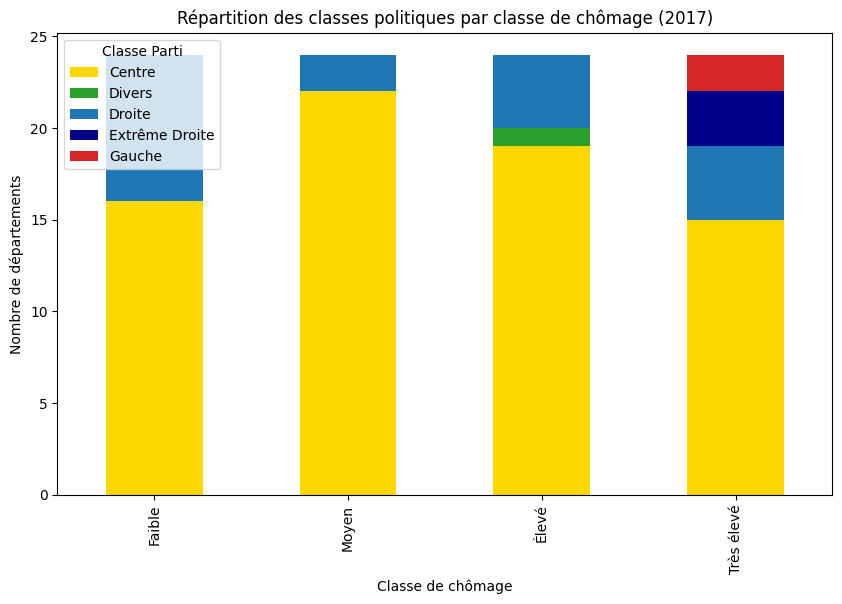

In [53]:
# Dictionnaire associant des classes à des couleurs
class_colors = {
    'Droite': '#1f77b4',  # Bleu
    'Extrême Droite': '#00008B',  # Bleu foncé
    'Centre': '#FFD700',  # Jaune
    'Gauche': '#d62728',  # Rouge
    'Divers': '#2ca02c',   # Vert
}

# Appliquer les couleurs en fonction des colonnes
colors = [class_colors[Classe] for Classe in crosstabs_2017.columns]

# Créer le graphique avec des couleurs spécifiques
crosstabs_2017.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)
plt.title("Répartition des classes politiques par classe de chômage (2017)")
plt.xlabel("Classe de chômage")
plt.ylabel("Nombre de départements")
plt.legend(title="Classe Parti")
plt.show()

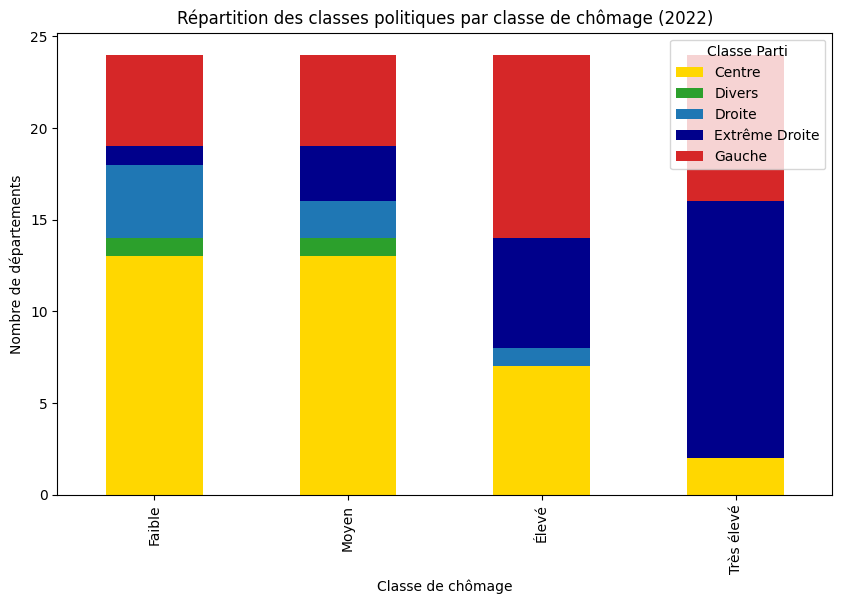

In [54]:
# Appliquer les couleurs en fonction des colonnes
colors = [class_colors[Classe] for Classe in crosstabs_2022.columns]

# Créer le graphique avec des couleurs spécifiques
crosstabs_2022.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)
plt.title("Répartition des classes politiques par classe de chômage (2022)")
plt.xlabel("Classe de chômage")
plt.ylabel("Nombre de départements")
plt.legend(title="Classe Parti")
plt.show()

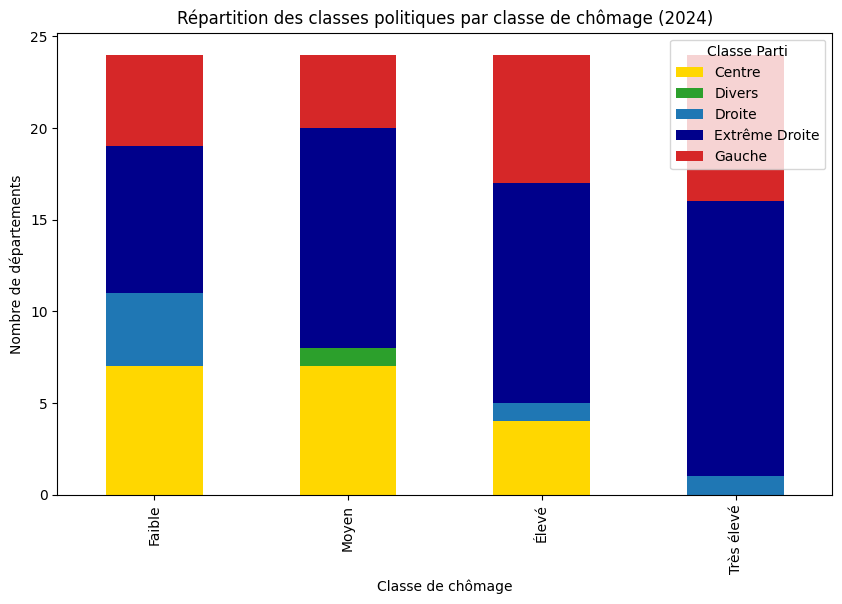

In [55]:
# Appliquer les couleurs en fonction des colonnes
colors = [class_colors[Classe] for Classe in crosstabs_2024.columns]

# Créer le graphique avec des couleurs spécifiques
crosstabs_2024.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)
plt.title("Répartition des classes politiques par classe de chômage (2024)")
plt.xlabel("Classe de chômage")
plt.ylabel("Nombre de départements")
plt.legend(title="Classe Parti")
plt.show()